In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500,6), 0)

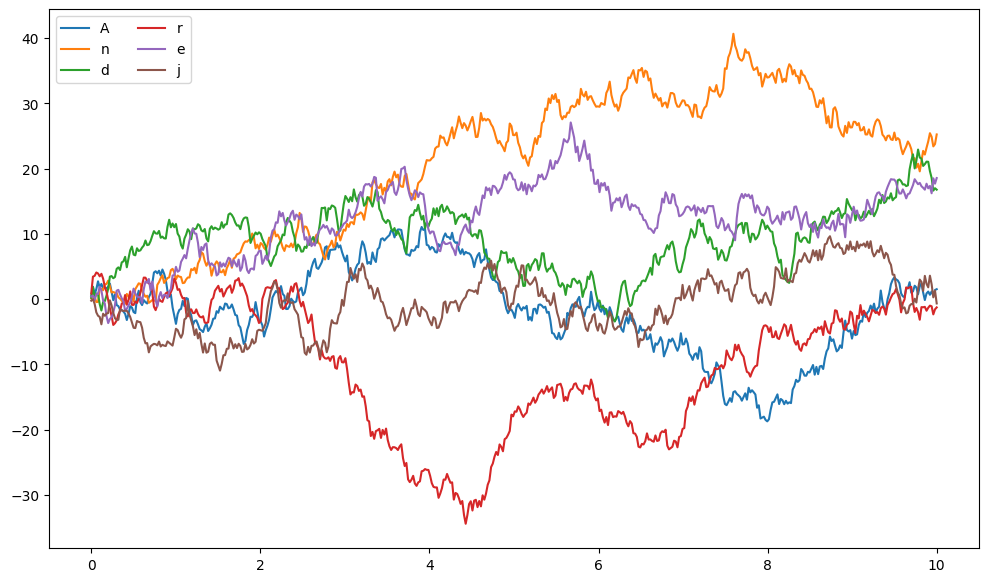

In [52]:
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend('Andrej', ncol=2, loc='upper left')

In [25]:
import requests
import pandas as pd

In [4]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [10]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-02-02 12:56:04.041018')

In [11]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [12]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [13]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-02-02 13:00:00,23827,23835,23770,23805,37.596475,8.949898e+05
2023-02-02 14:00:00,23805,23815,23713,23767,183.606743,4.364504e+06
2023-02-02 15:00:00,23760,23942,23540,23615,252.547532,6.002515e+06
2023-02-02 16:00:00,23608,23926,23560,23847,150.575740,3.578376e+06
2023-02-02 17:00:00,23847,23903,23779,23793,71.384354,1.701209e+06


<AxesSubplot:xlabel='CloseTime'>

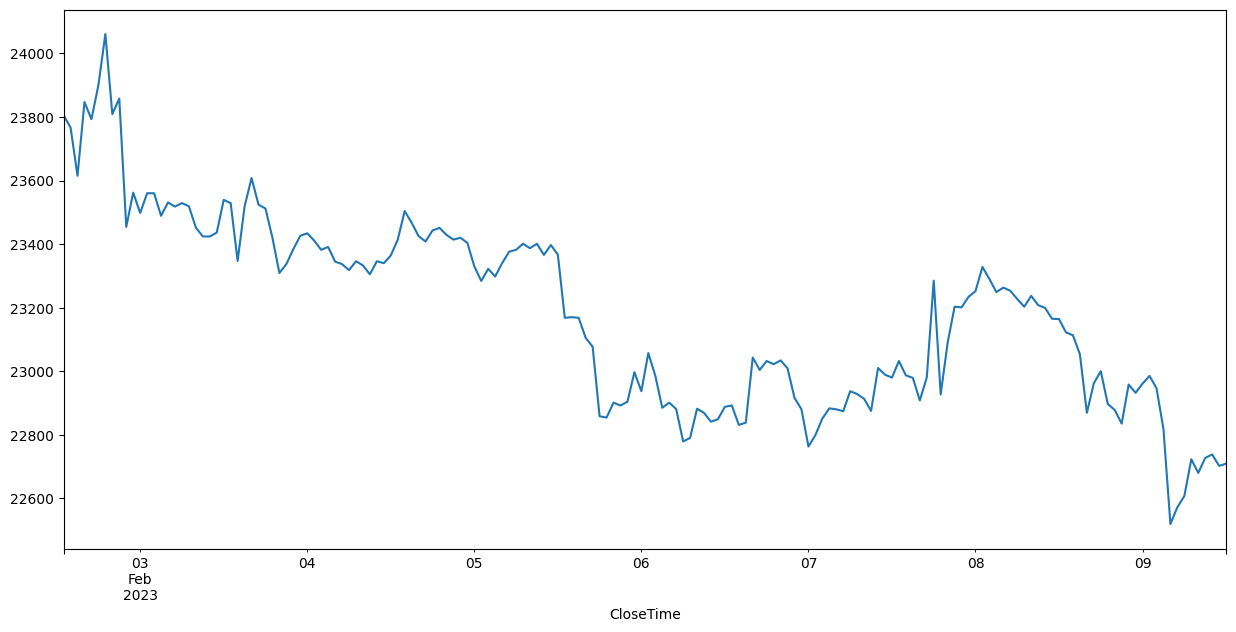

In [14]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [15]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-02-02 13:00:00,1672.2,1677.7,1669.8,1677.3,211.049075,3.532732e+05
2023-02-02 14:00:00,1677.2,1677.5,1669.7,1672.7,1878.207204,3.141692e+06
2023-02-02 15:00:00,1672.4,1690.6,1649.9,1655.7,2333.455846,3.901699e+06
2023-02-02 16:00:00,1656.7,1685.4,1653.2,1677.6,669.570894,1.115033e+06
2023-02-02 17:00:00,1678.3,1684.1,1673.0,1673.0,643.662712,1.080704e+06


<AxesSubplot:xlabel='CloseTime'>

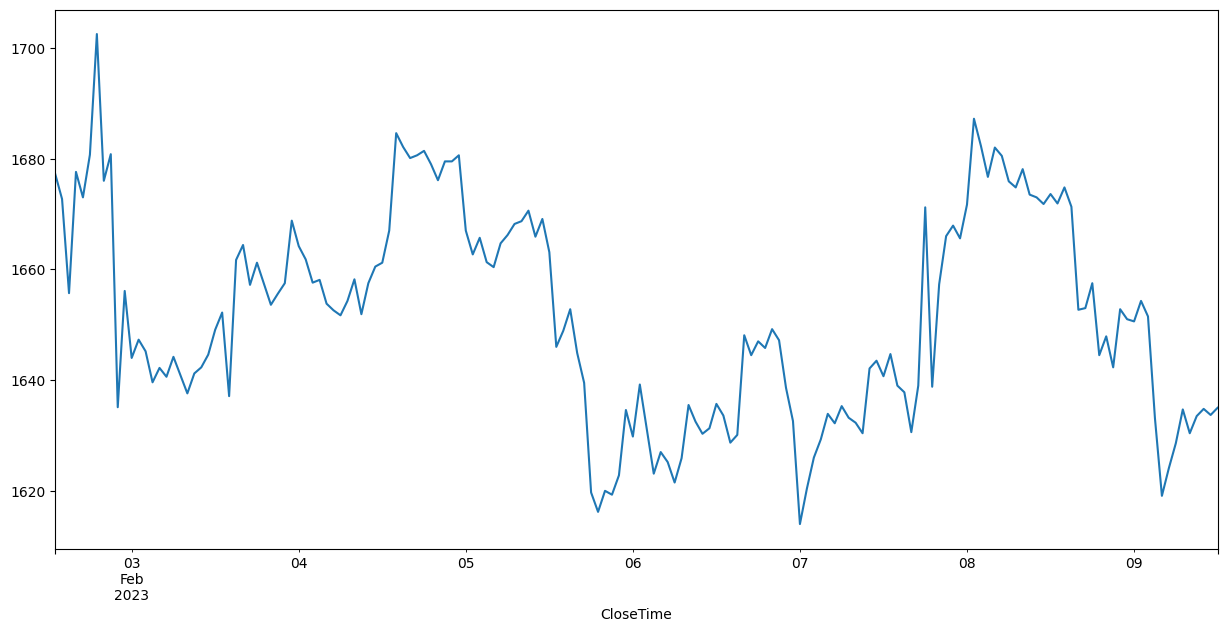

In [16]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [17]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [18]:
output_notebook()

Loading BokehJS ...

In [19]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [20]:
print(type(btc))

<class 'pandas.core.frame.DataFrame'>


In [27]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [28]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [29]:
eth.to_excel(writer, sheet_name='Ether')

In [30]:
writer.save()